In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
#names = ['ID','UserID','first_name','last_name','email','gender','City','Country', 'Age', 'Profession','Architecture', 'Clothing', 'Food','Transport','MainCategory']
#dataset = pd.read_csv("F:/Masters/Semester 3/Thesis/x17170885/backup_01July2019/dataset-final.csv", delimiter=",",names=names)
#dataset.drop(dataset.columns[[0,1, 2, 3, 4, 5, 6, 7, 8, 9]], axis=1, inplace=True)
#dataset = dataset.iloc[1:]


names = ['ID','UserID','first_name','last_name','email','gender','City','Country', 'Age', 'Profession','Adventure','Architecture', 'Beach', 'Clothing', 'Food', 'Nature','MainCategory']
dataset = pd.read_csv("F:/Masters/Semester 3/thesis/x17170885/Dataset/KNN/50/dataset-final.csv", delimiter=",",names=names)
dataset.drop(dataset.columns[[0,1, 2, 3, 4, 5, 6, 7, 8, 9]], axis=1, inplace=True)
dataset = dataset.iloc[1:]


In [52]:
dataset.head()

,Adventure,Architecture,Beach,Clothing,Food,Nature,MainCategory
1,1,1,2,0,3,2,4
2,3,3,0,1,1,2,1
3,3,2,0,0,2,3,5
4,3,5,0,0,0,2,1
5,3,3,0,1,1,2,1


In [53]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 4].values
#y = dataset.iloc[:, 6].values

In [54]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  

In [55]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [56]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
y_pred = classifier.predict(X_test)  


In [58]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[3 0 0 0]
 [3 2 0 0]
 [0 0 2 0]
 [0 0 3 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.40      0.57         5
           2       0.40      1.00      0.57         2
           3       0.00      0.00      0.00         3

   micro avg       0.54      0.54      0.54        13
   macro avg       0.47      0.60      0.45        13
weighted avg       0.56      0.54      0.46        13



C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [59]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 30):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

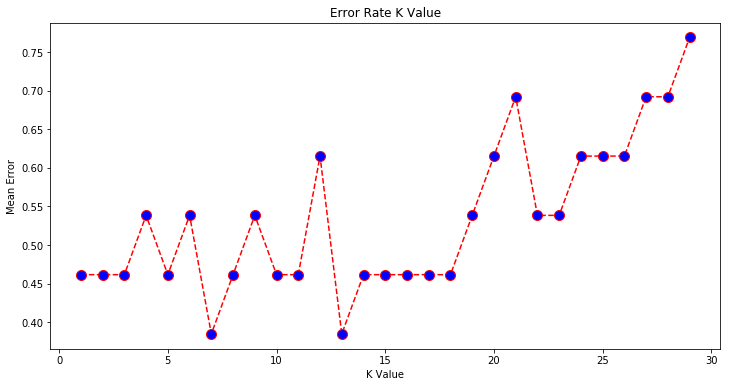

In [60]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  